In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:

!pip install chardet

import chardet

with open('/content/Sample - Superstore.csv', 'rb') as f:
    result = chardet.detect(f.read())

print(result)


{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [3]:
import pandas as pd

df = pd.read_csv('/content/Sample - Superstore.csv', encoding='windows-1252')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


**📊 Exploratory Data Analysis (EDA)**

How many unique products, customers, and categories are in the dataset?

.nunique() → returns the number of unique/distinct values in a column.

Product ID → tells you how many different products exist.

Customer ID → tells you how many different customers purchased.

Category → tells you how many different product categories exist.

In [6]:
unique_prod=df['Product ID'].nunique()
print("The Total Product Count is ",unique_prod)
unique_cust = df['Customer ID'].nunique()
print("The Total Unique Customer Count is ",unique_cust)
unique_catg = df['Category'].nunique()
print("The Total categories are ",unique_catg)

The Total Product Count is  1862
The Total Unique Customer Count is  793
The Total categories are  3


Which ship mode is most commonly used?

In [7]:
# Count the frequency of each ship mode
ship_mode = df['Ship Mode'].value_counts()

# Get the most common ship mode
most_common_mode = ship_mode.idxmax()
most_common_count = ship_mode.max()

print(f"The most commonly used ship mode is '{most_common_mode}' with {most_common_count} orders.")

The most commonly used ship mode is 'Standard Class' with 5968 orders.


Which states/cities have the highest number of orders?

In [8]:
# Group by both State and City
state_city_orders = (df.groupby(['State', 'City'])['Order ID'].count().sort_values(ascending=False))

print("Top 5 (State, City) pairs with highest number of orders:")
print(state_city_orders.head(5))


Top 5 (State, City) pairs with highest number of orders:
State         City         
New York      New York City    915
California    Los Angeles      747
Pennsylvania  Philadelphia     537
California    San Francisco    510
Washington    Seattle          428
Name: Order ID, dtype: int64


Find the average delivery time (Ship Date – Order Date).

dataset probably has dates stored as strings (e.g., "11/03/2019").

pd.to_datetime() converts those strings into proper datetime objects in Pandas.

This allows you to do date calculations (subtraction, filtering by date, etc.).

.dt.days extracts just the number of days (ignores hours/minutes).
The f"..." is an f-string (formatted string).

{avg_delivery_time:.2f} means: show the value with 2 decimal places.

Output might look like:

In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days
avg_delivery_time = df['Delivery Time'].mean()
print(f"Average Delivery Time: {avg_delivery_time:.2f} days")

Average Delivery Time: 3.96 days


**💰 Sales & Profit Analysis**

**Analyze which regions/customers are most profitable**

In [10]:
customer_profit = df.groupby("Customer Name")["Profit"].sum().sort_values(ascending=False).head(10)
print(customer_profit)

Customer Name
Tamara Chand            8981.3239
Raymond Buch            6976.0959
Sanjit Chand            5757.4119
Hunter Lopez            5622.4292
Adrian Barton           5444.8055
Tom Ashbrook            4703.7883
Christopher Martinez    3899.8904
Keith Dawkins           3038.6254
Andy Reiter             2884.6208
Daniel Raglin           2869.0760
Name: Profit, dtype: float64


In [11]:
region_profit = df.groupby("Region")["Profit"].sum().sort_values(ascending=False)
print(region_profit)


Region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: Profit, dtype: float64


 Find the category with the highest sales and profit

In [12]:
highest_sale_category = df.groupby('Category')[['Sales','Profit']].sum().sort_values('Sales',ascending=False)
highest_sale_category

,Sales,Profit
Category,,
Technology,836154.0330,145454.9481
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008


Which subcategory contributes the most to sales?
Which subcategory contributes the most to Profit?

In [13]:
highest_subcatg = (
    df.groupby('Sub-Category')['Sales']
      .sum()
      .sort_values(ascending=False)
)

# Show top 5 sub-categories
print("Top 5 Sub-Categories by Total Sales:")
print(highest_subcatg.head(5))


Top 5 Sub-Categories by Total Sales:
Sub-Category
Phones     330007.054
Chairs     328449.103
Storage    223843.608
Tables     206965.532
Binders    203412.733
Name: Sales, dtype: float64


In [14]:
highest_subcatg_proft = (
    df.groupby('Sub-Category')['Profit']
      .sum()
      .sort_values(ascending=False)
)

# Show top 5 sub-categories
print("Top 5 Sub-Categories by Total Profit:")
print(highest_subcatg_proft.head(5))


Top 5 Sub-Categories by Total Profit:
Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Name: Profit, dtype: float64


Which subcategory is making losses (negative profit)?

In [15]:
# Group by Sub-Category and sum the profit
subcategory_profit = (
    df.groupby('Sub-Category')['Profit']
      .sum()
      .sort_values()
)

# Filter only negative profits
loss_subcategories = subcategory_profit[subcategory_profit < 0]

print("Sub-Categories making losses:")
print(loss_subcategories)


Sub-Categories making losses:
Sub-Category
Tables      -17725.4811
Bookcases    -3472.5560
Supplies     -1189.0995
Name: Profit, dtype: float64


Which region generates the most sales vs. profit?

In [16]:
# Group by Region and calculate total Sales & Profit
region_summary = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

print("Sales and Profit by Region:")
print(region_summary)


Sales and Profit by Region:
               Sales       Profit
Region                           
West     725457.8245  108418.4489
East     678781.2400   91522.7800
Central  501239.8908   39706.3625
South    391721.9050   46749.4303


Compare sales vs. profit by year – is the company growing?

In [17]:
# Make sure Order Date is datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract Year
df['Year'] = df['Order Date'].dt.year
# Summarize Sales & Profit by Year
yearly_summary = df.groupby('Year')[['Sales', 'Profit']].sum()
print(yearly_summary)


            Sales      Profit
Year                         
2014  484247.4981  49543.9741
2015  470532.5090  61618.6037
2016  609205.5980  81795.1743
2017  733215.2552  93439.2696


**📦 Product & Discount Insights**

Identify the top 10 most sold products.

In [18]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
print('The Top 10 Most sold Products are:')
print(top_products.head())


The Top 10 Most sold Products are:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64


Helps identify best-selling products to focus on for marketing or inventory.

Sometimes a product may sell many units but have lower total sales if it’s low-cost.

Which products are high sales but low profit (bad for business)?

In [19]:
prod_analysis = (
    df.groupby('Product Name')[['Sales','Profit']]
      .sum()
)

low_profit_products =prod_analysis[prod_analysis['Profit'] < 0.2 * prod_analysis['Sales']]
low_profit_products=low_profit_products.sort_values(by='Sales', ascending=False)

print("Products with high sales but low profit:")
print(low_profit_products.head(10))

Products with high sales but low profit:
                                                         Sales        Profit
Product Name                                                                
Cisco TelePresence System EX90 Videoconferencin...  22638.4800 -1.811078e+03
HON 5400 Series Task Chairs for Big and Tall        21870.5760  5.684342e-14
GBC DocuBind TL300 Electric Binding System          19823.4790  2.233505e+03
GBC Ibimaster 500 Manual ProClick Binding System    19024.5000  7.609800e+02
GBC DocuBind P400 Electric Binding System           17965.0680 -1.878166e+03
High Speed Automatic Electric Letter Opener         17030.3120 -2.620048e+02
Lexmark MX611dhe Monochrome Laser Printer           16829.9010 -4.589973e+03
Martin Yale Chadless Opener Electric Letter Opener  16656.2000 -1.299184e+03
Riverside Palais Royal Lawyers Bookcase, Royale...  15610.9656 -6.695448e+02
Samsung Galaxy Mega 6.3                             13943.6680  1.822757e+03


These products generate a lot of revenue but don’t make much profit.

Could be due to:

High discounts

High cost of goods sold

Low-margin products

This analysis helps business focus on profitability, not just sales.

Plot the relationship between quantity ordered and profit.

In [20]:
corr_qp = df['Quantity'].corr(df['Profit'])
print(f"Correlation between Ordered Quantity and Profit: {corr_qp:.2f}")


Correlation between Ordered Quantity and Profit: 0.07


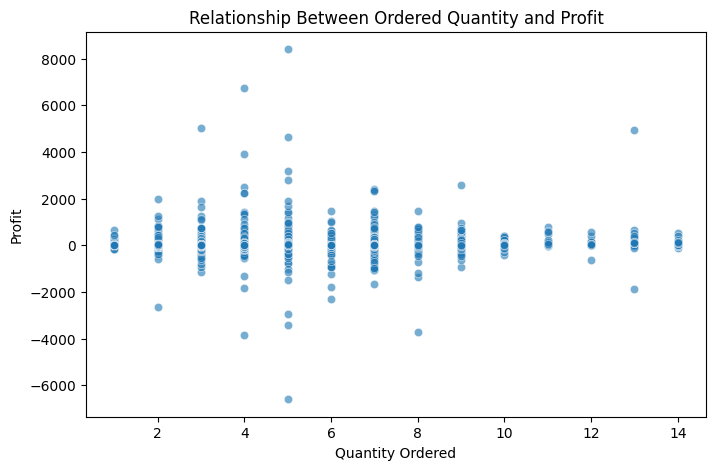

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Quantity', y='Profit', alpha=0.6)
plt.title("Relationship Between Ordered Quantity and Profit")
plt.xlabel("Quantity Ordered")
plt.ylabel("Profit")
plt.show()

Interpretation for Superstore:

Most orders with small quantity still give positive profit.

Some orders with high quantity may have low or negative profit — likely due to high discounts.

Overall trend is slightly positive, meaning increasing quantity usually increases profit, but it’s not guaranteed.

Does giving a higher discount always increase sales?

In [22]:
# Grouping discounts into bins (0-10%, 10-20%, etc.)
df['Discount Range'] = pd.cut(df['Discount'], bins=[0,0.1,0.2,0.3,0.4,0.5,1],
                    labels=['0-10%','10-20%','20-30%','30-40%','40-50%','50%+'])

# Average sales by discount range
discount_sales = df.groupby('Discount Range')['Sales'].mean().reset_index()
print(discount_sales)

  Discount Range       Sales
0          0-10%  578.397351
1         10-20%  213.575867
2         20-30%  454.742974
3         30-40%  561.850827
4         40-50%  836.409273
5           50%+   75.033572


/tmp/ipython-input-4021629728.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_sales = df.groupby('Discount Range')['Sales'].mean().reset_index()


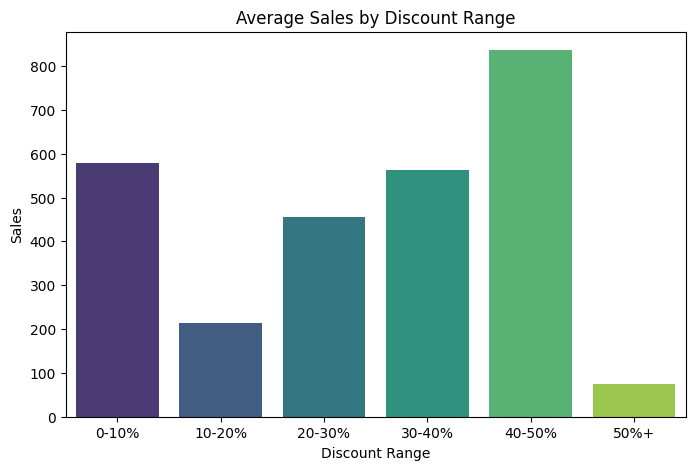

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(data=discount_sales, x='Discount Range', y='Sales', palette='viridis',hue='Discount Range')
plt.title("Average Sales by Discount Range")
plt.show()

In [24]:
corr = df['Discount'].corr(df['Sales'])
print(f"Correlation between Discount and Sales: {corr:.2f}")
#-1 → perfect negative correlation: as Discount increases, Sales decrease.

Correlation between Discount and Sales: -0.03


Business Interpretation

After running,The Findings are:

Some discounts may boost sales.

Very high discounts often don’t always increase sales consistently.

Profit might even go down (so you could check Discount vs Profit too).

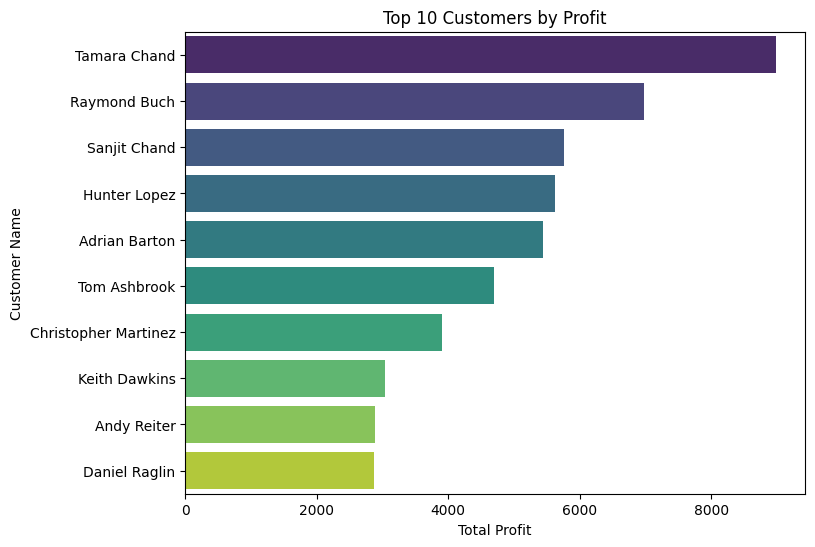

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(x=customer_profit.values, y=customer_profit.index, hue=customer_profit.index,palette="viridis")

plt.title("Top 10 Customers by Profit")
plt.xlabel("Total Profit")
plt.ylabel("Customer Name")
plt.show()

plot Sales & Profit by Category on the same chart.

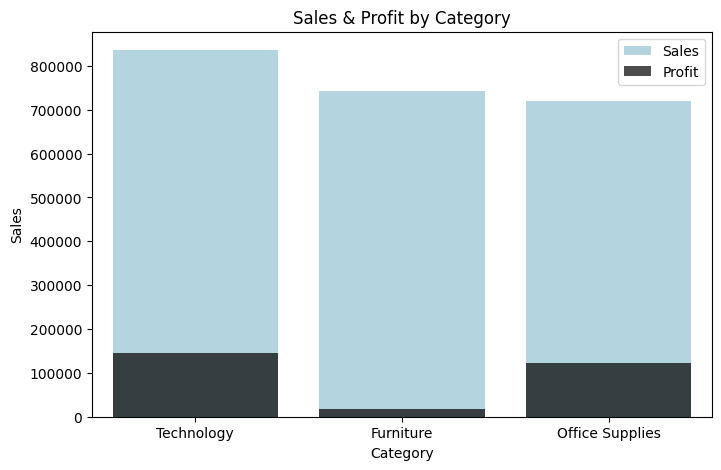

In [26]:
data = highest_sale_category.reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=data, x="Category", y="Sales", color="lightblue", label="Sales")
sns.barplot(data=data, x="Category", y="Profit", color="black", alpha=0.7, label="Profit")

plt.title("Sales & Profit by Category")
plt.legend()
plt.show()

**🗺 Geographical Analysis**

Create a map (or heatmap) showing sales by state.

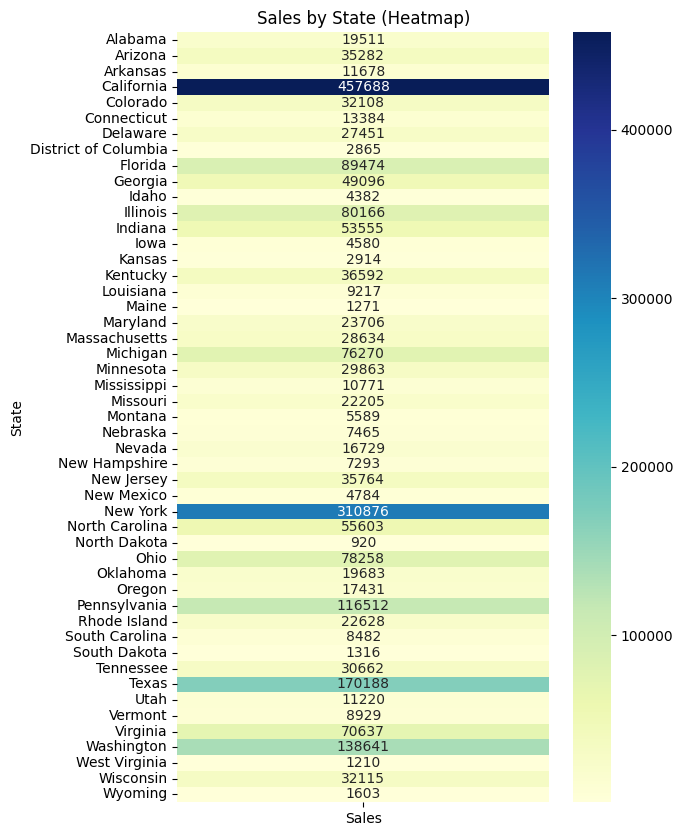

In [27]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Group by state and get sales
state_sales = df.groupby("State")["Sales"].sum().reset_index()

# Pivot to make it heatmap-friendly
state_sales_pivot = state_sales.pivot_table(values="Sales", index="State")

# Plot heatmap
plt.figure(figsize=(6,10))
sns.heatmap(state_sales_pivot, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Sales by State (Heatmap)")
plt.show()


Visualize the Profit by Regions

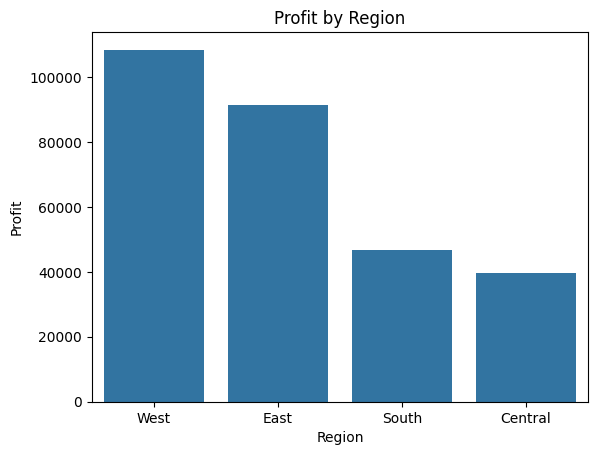

In [28]:
sns.barplot(data=region_profit.reset_index(),x='Region', y='Profit')
plt.title("Profit by Region")
plt.show()


Which cities are least profitable?

Least Profitable Cities:
City
Philadelphia   -13837.7674
Houston        -10153.5485
San Antonio     -7299.0502
Lancaster       -7239.0684
Chicago         -6654.5688
Burlington      -3622.8772
Dallas          -2846.5257
Phoenix         -2790.8832
Aurora          -2691.7386
Jacksonville    -2323.8350
Name: Profit, dtype: float64


/tmp/ipython-input-4283210496.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_profit.head(10).values, y=city_profit.head(10).index, palette="Reds_r")


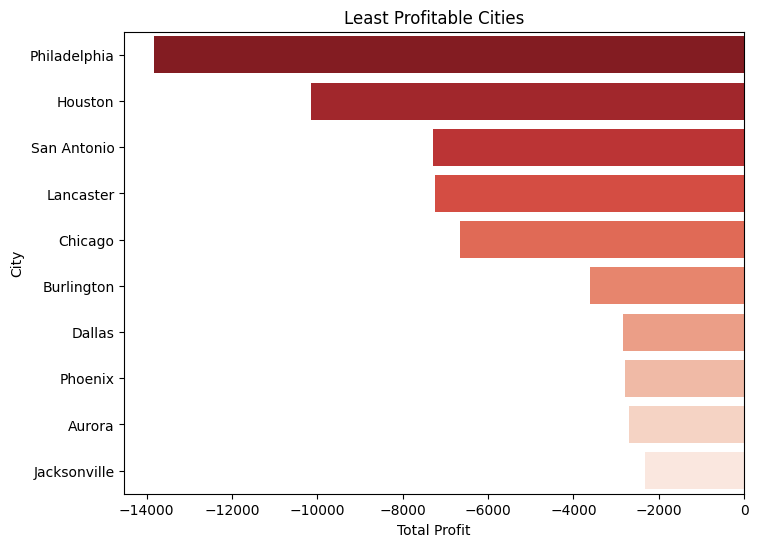

In [29]:
# Group by City and calculate total Profit
city_profit = df.groupby("City")["Profit"].sum().sort_values()

# Show bottom 10 least profitable cities
print("Least Profitable Cities:")
print(city_profit.head(10))


plt.figure(figsize=(8,6))
sns.barplot(x=city_profit.head(10).values, y=city_profit.head(10).index, palette="Reds_r")
plt.title("Least Profitable Cities")
plt.xlabel("Total Profit")
plt.ylabel("City")
plt.show()


Which region has the largest average order size?

In [30]:
# Calculate average order size by region
avg_order_size = df.groupby("Region")["Sales"].mean().sort_values(ascending=False)

print("Average Order Size by Region:")
print(avg_order_size)


Average Order Size by Region:
Region
South      241.803645
East       238.336110
West       226.493233
Central    215.772661
Name: Sales, dtype: float64


**Time Series Analysis**

Plot monthly sales trend – is there seasonality?

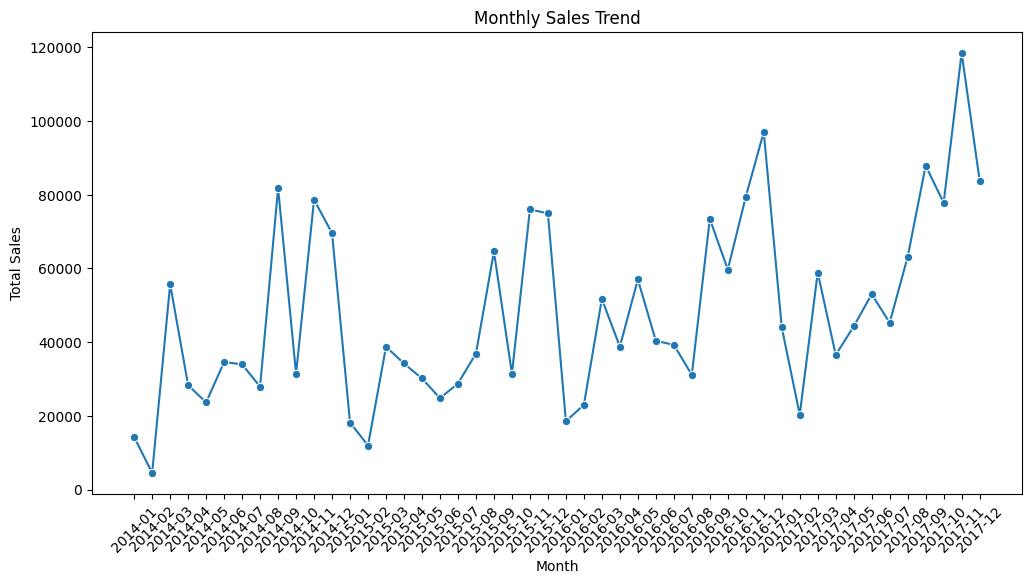

In [31]:
# To ensure dates are in datetime  becuse
df['Order Date']= pd.to_datetime(df['Order Date'])
# Extract Year-Month
df['YearMonth'] = df['Order Date'].dt.to_period('M')
 #Group by YearMonth and sum sales
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()
# Convert YearMonth to string
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='YearMonth', y='Sales', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


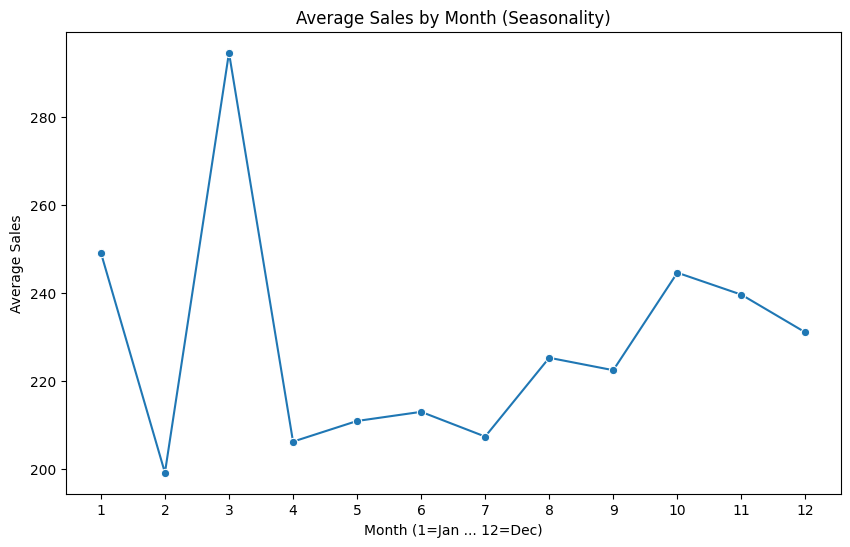

Peak months for sales are:
    Month       Sales
2       3  294.548116
0       1  249.146550
9      10  244.594609
10     11  239.606438
11     12  231.032318


In [32]:
# Extract just month (1–12) to see seasonality
df['Month'] = df['Order Date'].dt.month

# Average sales by month across years
seasonality = df.groupby('Month')['Sales'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=seasonality, x='Month', y='Sales', marker='o')
plt.title("Average Sales by Month (Seasonality)")
plt.xlabel("Month (1=Jan ... 12=Dec)")
plt.xticks(ticks=range(1,13))
plt.ylabel("Average Sales")
plt.show()

print("Peak months for sales are:")
print(seasonality.sort_values(by='Sales', ascending=False).head())


Monthly Profit Trend

Plot monthly total profit.

Compare the trend with sales

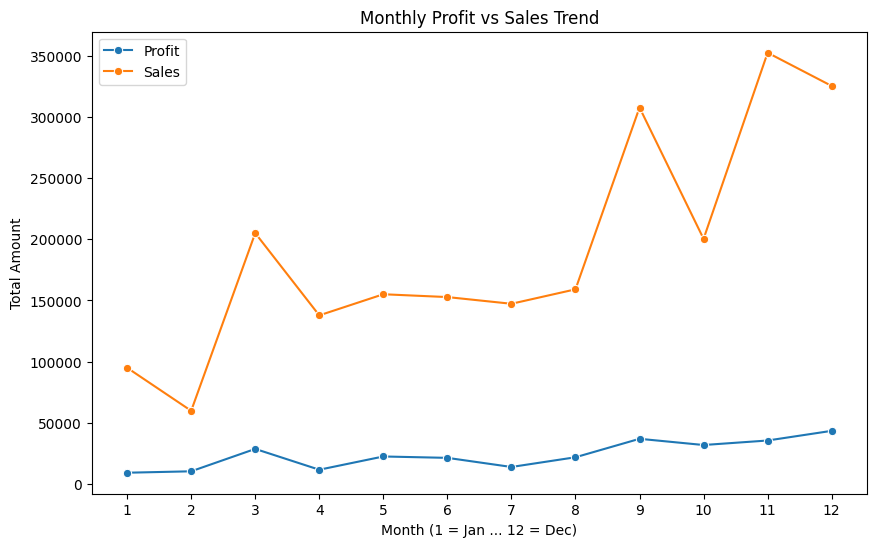

In [33]:
df['Month'] = df['Order Date'].dt.month


Total_profit = df.groupby('Month')['Profit'].sum().reset_index()
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=Total_profit, x='Month', y='Profit', marker='o',label="Profit")
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o', label="Sales")
plt.title("Monthly Profit vs Sales Trend")
plt.xlabel("Month (1 = Jan ... 12 = Dec)")
plt.xticks(ticks=range(1,13))
plt.ylabel("Total Amount")
plt.legend()
plt.show()

If sales are high but profit is low (or negative) → discounts or losses in that month.

If profit follows sales trend → healthy business.

Peak months in sales ≠ always peak months in profit.High sales ≠ always high profit → in some months (like March, September), sales are high but profit is relatively modest. This likely means heavy discounts or high costs reduced profitability.

December stands out as both high sales and high profit, making it the strongest month overall.

Region-wise Monthly Sales

Create a line plot of monthly sales for each region.

Find which region grows fastest

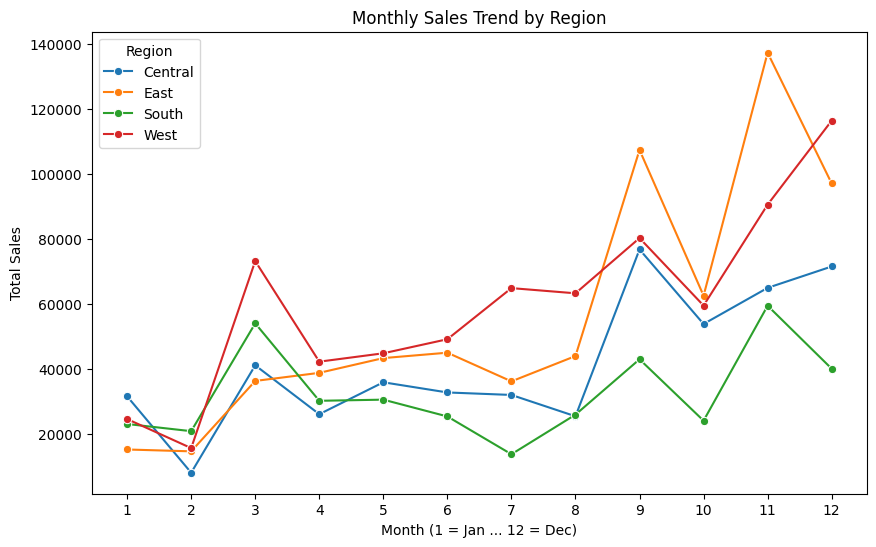

In [34]:

mon_reg_sale = df.groupby(['Month', 'Region'])['Sales'].sum().reset_index()

# Single plot with all regions
plt.figure(figsize=(10,6))
sns.lineplot(data=mon_reg_sale, x='Month', y='Sales', hue='Region', marker='o')

plt.title("Monthly Sales Trend by Region")
plt.xlabel("Month (1 = Jan ... 12 = Dec)")
plt.ylabel("Total Sales")
plt.xticks(ticks=range(1,13))
plt.legend(title="Region")
plt.show()


   Year        Sales
0  2014  484247.4981
1  2015  470532.5090
2  2016  609205.5980
3  2017  733215.2552


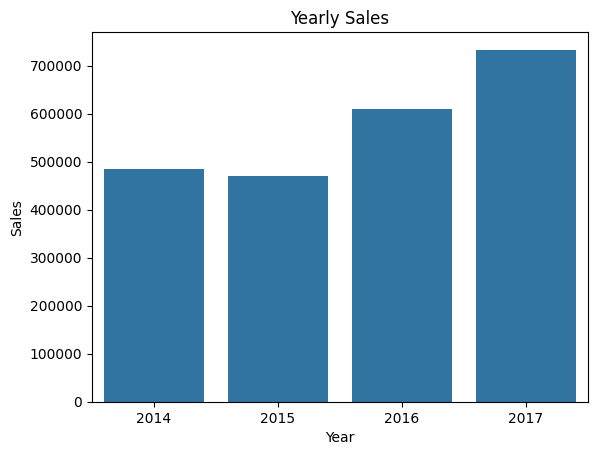

In [35]:
# Extract year from Order Date
df['Year'] = df['Order Date'].dt.year

# Group by Year and sum Sales
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()

# Display
print(yearly_sales)

sns.barplot(data=yearly_sales, x='Year', y='Sales')
plt.title('Yearly Sales')
plt.show()